<a href="https://colab.research.google.com/github/ridvanyigit/Tensorflow-2.0/blob/main/MNIST_Digit_Recognition_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

Importing necessary libraries for deep learning and data manipulation.

In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

print(tf.__version__) # Printing tensorflow version

2.18.0


 ## Data Loading and Preparation

Loading the MNIST handwritten digit dataset using TensorFlow Keras.

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Displaying the first image from the training set to get a sense of the data.

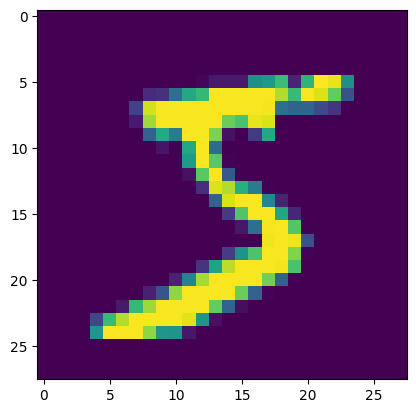

In [29]:
plt.imshow(x_train[0])

## Data Preprocessing: `Normalization`

In [30]:
x_train.max() # Finding the maximum pixel value

np.uint8(255)

Normalizing the pixel values to a range between 0 and 1.  This helps improve model training.

In [31]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [32]:
x_train.max() # Checking maximum pixel value after normalization

np.float32(1.0)

## Reshaping Data for CNN Input

Printing shape of train and test data


In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
x_train.shape[0] # Displaying the number of training samples

60000

In [35]:
x_train[0].shape # Displaying the shape of a single image

(28, 28)

In [36]:
img_width, img_height = 28, 28
num_channels = 1

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [37]:
x_train[0].shape # Confirm the reshaped image shape

(28, 28, 1)

Defining Input Shape for the Model

In [39]:
input_shape = (img_width, img_height, num_channels)

## Creating the CNN Model

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary() # Display the model's architecture

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model

In [42]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

Training the Model

In [43]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    verbose=1, # Displays training progress
    validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 331ms/step - accuracy: 0.8372 - loss: 0.5065 - val_accuracy: 0.9817 - val_loss: 0.0553
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 209s 347ms/step - accuracy: 0.9726 - loss: 0.0897 - val_accuracy: 0.9892 - val_loss: 0.0347
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 330ms/step - accuracy: 0.9811 - loss: 0.0626 - val_accuracy: 0.9900 - val_loss: 0.0293
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 328ms/step - accuracy: 0.9839 - loss: 0.0531 - val_accuracy: 0.9913 - val_loss: 0.0301
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 320ms/step - accuracy: 0.9871 - loss: 0.0402 - val_accuracy: 0.9899 - val_loss: 0.0291
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 330ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9897 - val_loss: 0.0305
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 331ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 328ms/step - accuracy: 0.9911 -

Evaluating the Model

In [45]:
%%time
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9903 - loss: 0.0307
CPU times: user 11 s, sys: 167 ms, total: 11.2 s
Wall time: 10.3 s


[0.025058522820472717, 0.9923999905586243]

Examining Training History

In [46]:
history.history

{'accuracy': [0.923550009727478,
  0.9737666845321655,
  0.9807833433151245,
  0.9838833212852478,
  0.9864833354949951,
  0.9880333542823792,
  0.9884666800498962,
  0.9903833270072937,
  0.9903833270072937,
  0.9912333488464355],
 'loss': [0.24874135851860046,
  0.08690095692873001,
  0.06356239318847656,
  0.053566426038742065,
  0.0437781997025013,
  0.03798023983836174,
  0.035909805446863174,
  0.031097428873181343,
  0.029048848897218704,
  0.026653625071048737],
 'val_accuracy': [0.9817000031471252,
  0.9891999959945679,
  0.9900000095367432,
  0.9912999868392944,
  0.9898999929428101,
  0.9897000193595886,
  0.9908000230789185,
  0.9918000102043152,
  0.9916999936103821,
  0.9923999905586243],
 'val_loss': [0.05529491603374481,
  0.03470608964562416,
  0.029267314821481705,
  0.030114607885479927,
  0.029052725061774254,
  0.030541669577360153,
  0.028420737013220787,
  0.026083437725901604,
  0.0267978273332119,
  0.02505851723253727]}

## Function to Plot Learning Curves

In [47]:
def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  # plot training & validadion accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

Plotting Learning Curves

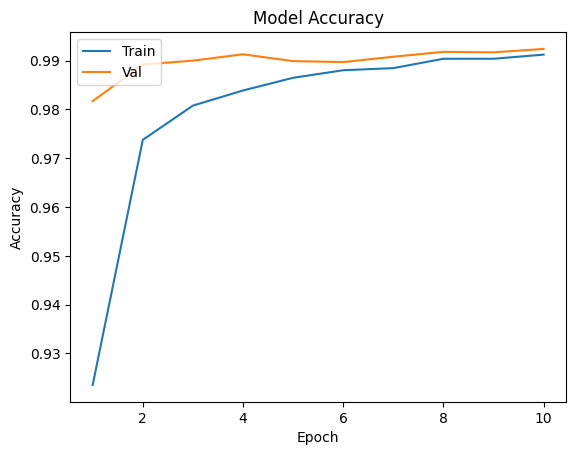

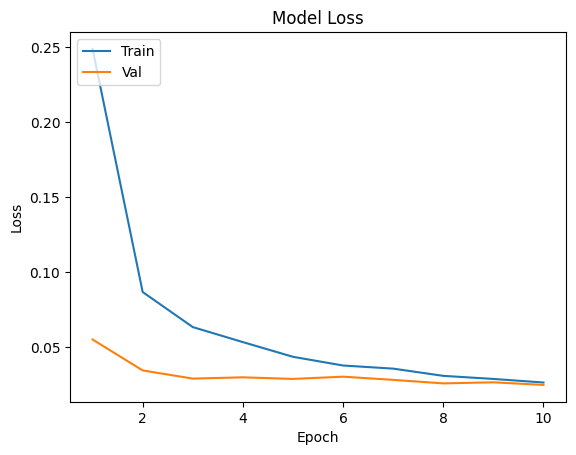

In [48]:
plot_learningCurve(history, 10)